

Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An
organization is only as good as its employees, and these people are the true source of its competitive advantage. 
Dataset is downloaded from
Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

We do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning &
Python.


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Reading the CSV file
hrd = pd.read_csv("/content/HR_comma_sep.csv")
hrd

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
hrd.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hrd.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
#random records
hrd.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
3571,0.81,0.83,3,133,3,1,0,0,IT,medium
692,0.84,0.86,5,268,5,0,1,0,marketing,medium
2818,0.64,0.90,2,101,6,0,0,0,IT,low
8860,0.86,0.61,4,221,2,0,0,0,marketing,medium
9664,0.90,0.68,4,204,4,1,0,0,support,low
11165,0.54,0.68,6,249,5,0,0,0,product_mng,medium
12338,0.39,0.50,2,142,3,0,1,0,hr,medium
6331,0.75,0.49,2,173,3,1,0,0,RandD,low
8117,0.24,0.64,5,190,4,0,0,0,sales,medium
2947,0.80,0.58,4,172,3,0,0,0,support,medium


In [ ]:
#shape of dataset
hrd.shape

(14999, 10)

In [ ]:
#size of the dataset
hrd.size

149990

In [ ]:
#columns of the dataset
hrd.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
#Datatypes of columns
hrd.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
#check the data for null values 
hrd.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# check columns for null values 
hrd.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

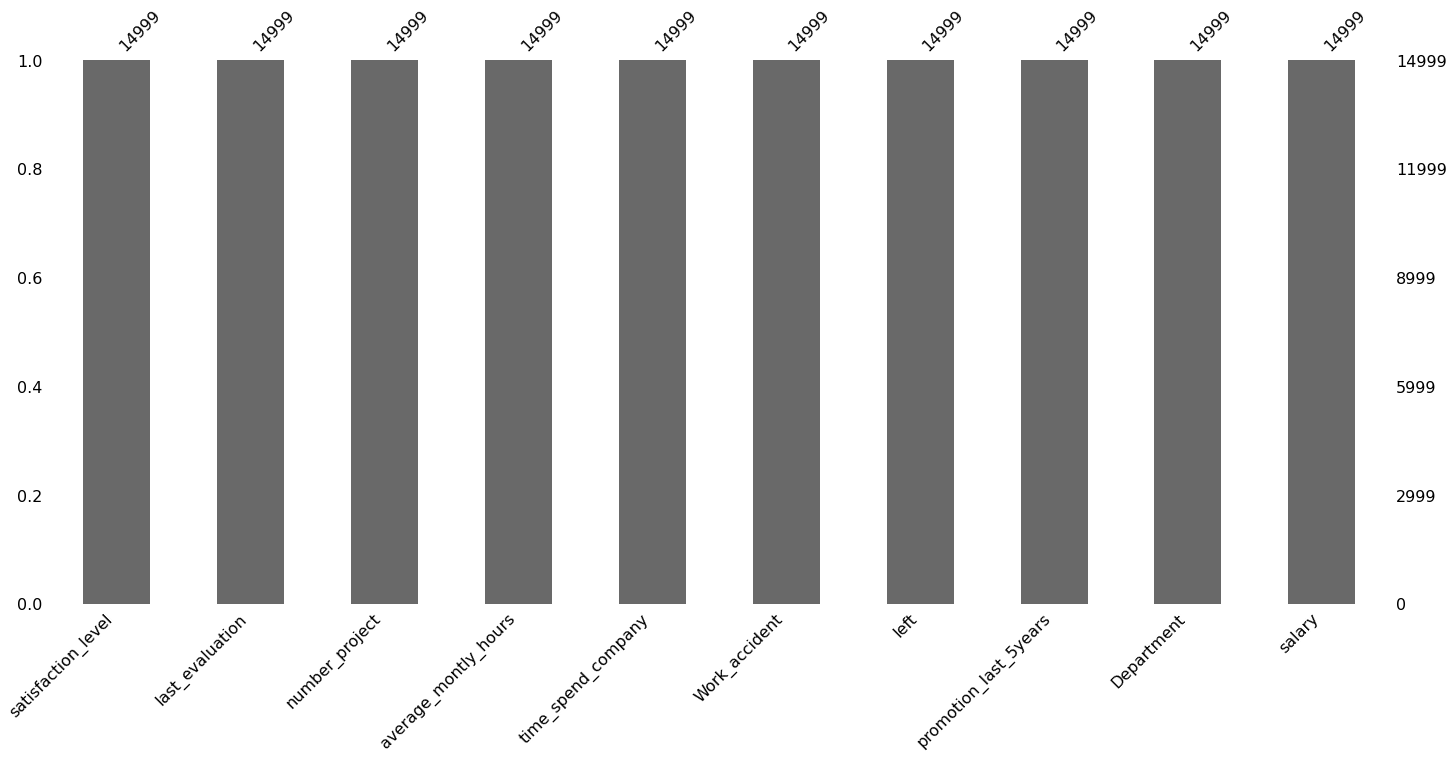

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(hrd)
plt.show()

In [ ]:
#number of unique values for each column
hrd.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [ ]:
# Memory used by each column 
hrd.memory_usage()

Index                       128
satisfaction_level       119992
last_evaluation          119992
number_project           119992
average_montly_hours     119992
time_spend_company       119992
Work_accident            119992
left                     119992
promotion_last_5years    119992
Department               119992
salary                   119992
dtype: int64

In [ ]:
# Minimun values of each column
hrd.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
Department                 IT
salary                   high
dtype: object

In [ ]:
# Maximum value of each column 
hrd.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
Department               technical
salary                      medium
dtype: object

In [ ]:
#basic information of dataset
hrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Statistical Measures of the Dataset
dts.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Checking mean of the columns w.r.t to left columns
hrd.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
#No.of people left compared to each column 
hrd.groupby("left").count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [ ]:
#Normalization of each category in left column 
hrd.left.value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [ ]:
# No of times each category repeated in number_project column
hrd.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [ ]:
# Normalization of each category in number_project Column
hrd.number_project.value_counts(normalize = True)


4    0.291019
3    0.270351
5    0.184079
2    0.159211
6    0.078272
7    0.017068
Name: number_project, dtype: float64

In [ ]:
# No.of times each category repeated in time_spend_company Column
hrd.time_spend_company.value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [ ]:
# Normalization of each category in time_spend_company Column
hrd.time_spend_company.value_counts(normalize = True)

3     0.429562
2     0.216281
4     0.170478
5     0.098207
6     0.047870
10    0.014268
7     0.012534
8     0.010801
Name: time_spend_company, dtype: float64

In [ ]:
# No.of times each category repeated in Work_accident Column
hrd.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [ ]:
# Normalization of each category in Work_accident Column
hrd.Work_accident.value_counts(normalize = True)


0    0.85539
1    0.14461
Name: Work_accident, dtype: float64

In [ ]:
# No.of times each category repeated in promotion_last_5years Column
hrd.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [ ]:
# Normalization of each category in promotion_last_5years Column
hrd.promotion_last_5years.value_counts(normalize = True)

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64

In [ ]:
# No.of times each category repeated in Department Column
hrd.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [ ]:
# Normalization of each category in Department Column
hrd.Department.value_counts(normalize = True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: Department, dtype: float64

In [ ]:
# No.of times each category repeated in Salary Column
hrd.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
# Normalization of each category in Salary Column
hrd.salary.value_counts(normalize = True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [ ]:
#correlation
hrd.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


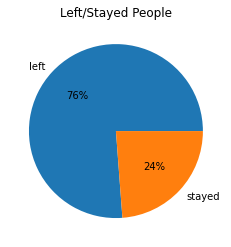

In [ ]:
##pie char for left/stayed people 
cnt = hrd.left.value_counts()
plt.pie(cnt,labels=["left","stayed"], autopct="%0.0f%%")
plt.title("Left/Stayed People")
plt.show()

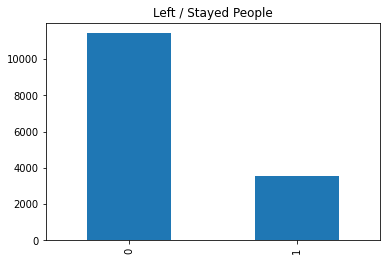

In [ ]:
# Bar Chart for Left/Stayed People
cnt = hrd.left.value_counts()
cnt.plot.bar()
plt.title("Left / Stayed People")
plt.show()

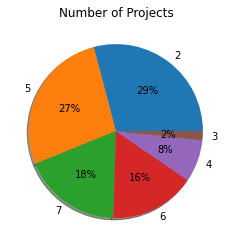

In [ ]:
# Pie Chart for Number of projects each employee done so far
cnt = hrd.number_project.value_counts()
plt.pie(cnt, labels = hrd.number_project.unique(), shadow = True, autopct = "%0.0f%%")
plt.title("Number of Projects")
plt.show()

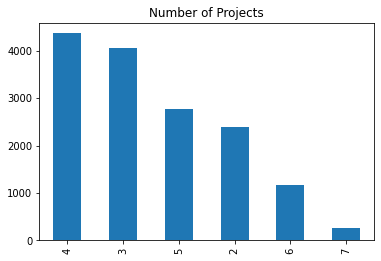

In [ ]:
# Bar Chart for Number of projects each employee done so far
cnt = hrd.number_project.value_counts()
cnt.plot.bar()
plt.title("Number of Projects")
plt.show()


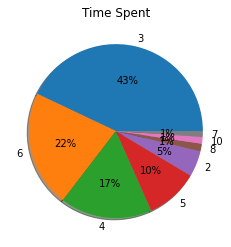

In [ ]:
# Pie Chart for Time Spent by the Employee
cnt = hrd.time_spend_company.value_counts()
plt.pie(cnt, labels = hrd.time_spend_company.unique(), shadow = True, autopct = "%0.0f%%")
plt.title("Time Spent")
plt.show()

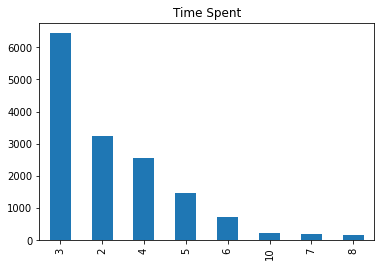

In [ ]:
# Bar Chart for Time Spent by the Employee
cnt = hrd.time_spend_company.value_counts()
cnt.plot.bar()
plt.title("Time Spent")
plt.show()

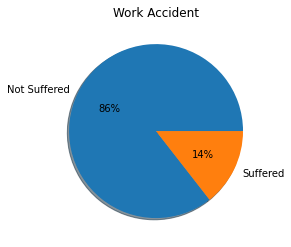

In [ ]:
# Pie Chart for Work Accident Column
cnt = hrd.Work_accident.value_counts()
plt.pie(cnt, labels = ["Not Suffered", "Suffered"], shadow = True, autopct = "%0.0f%%")
plt.title("Work Accident")
plt.show()


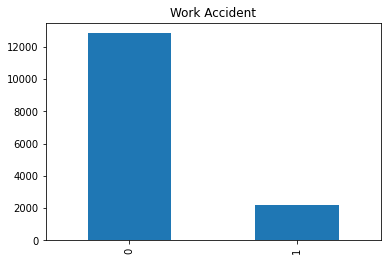

In [ ]:
# Bar Chart for Work Accident Column
cnt = hrd.Work_accident.value_counts()
cnt.plot.bar()
plt.title("Work Accident")
plt.show()

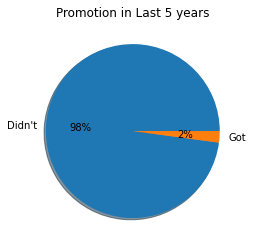

In [ ]:
# Pie Chart for Promotion in Last 5 years Column
cnt = hrd.promotion_last_5years.value_counts()
plt.pie(cnt, labels = ["Didn't", "Got"], shadow = True, autopct = "%0.0f%%")
plt.title("Promotion in Last 5 years")
plt.show()

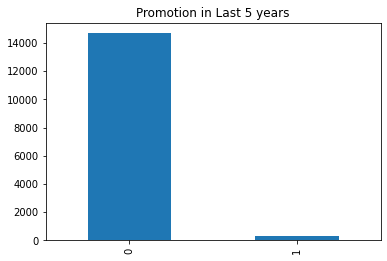

In [ ]:
# Bar Chart for Promotion in Last 5 years Column
cnt = hrd.promotion_last_5years.value_counts()
cnt.plot.bar()
plt.title("Promotion in Last 5 years")
plt.show()


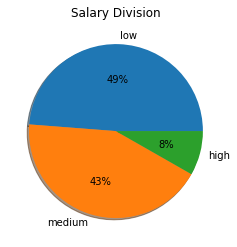

In [ ]:
# Pie Chart for Salary Division
cnt = hrd.salary.value_counts()
plt.pie(cnt, labels = hrd.salary.unique(), shadow = True, autopct = "%0.0f%%")
plt.title("Salary Division")
plt.show()

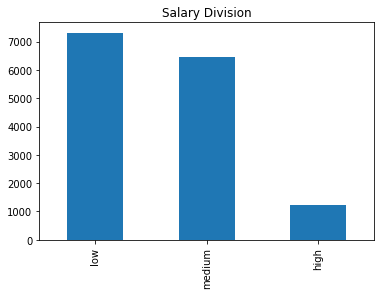

In [ ]:
# Bar Chart for Salary Category
cnt = hrd.salary.value_counts()
cnt.plot.bar()
plt.title("Salary Division")
plt.show()

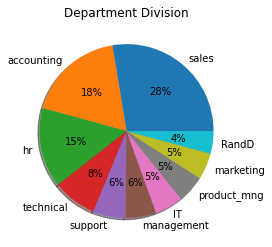

In [ ]:
# Pie Chart for Department Division
cnt = hrd.Department.value_counts()
plt.pie(cnt, labels = hrd.Department.unique(), shadow = True, autopct = "%0.0f%%")
plt.title("Department Division")
plt.show()

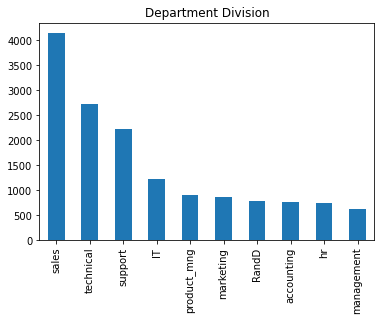

In [ ]:
# Bar Chart for Department Category
cnt = hrd.Department.value_counts()
cnt.plot.bar()
plt.title("Department Division")
plt.show()

In [ ]:
# Considering the most affected factors
mod_hrd = hrd[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
mod_hrd.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
# Getting dummy values for Salary
sal = pd.get_dummies(mod_hrd["salary"], prefix = "Salary")
sal

,Salary_high,Salary_low,Salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [ ]:
# Concatenating to main Dataframe
mod_hrd = pd.concat([mod_hrd, sal], axis = 1)
mod_hrd

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Salary_high,Salary_low,Salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [ ]:
# Dropping salary Column
mod_hrd = mod_hrd.drop(["salary"], axis = 1)

In [ ]:
# Splitting Data into dependent and independent variables
x = mod_hrd.copy()
y = hrd["left"]


In [ ]:
# Splitting the Data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 8, test_size = .2)

In [ ]:
print(x_train)
print("Shape : ", x_train.shape)


       satisfaction_level  average_montly_hours  ...  Salary_low  Salary_medium
6544                 0.79                   114  ...           0              0
2135                 0.64                   213  ...           0              1
857                  0.11                   303  ...           0              1
5609                 0.86                   237  ...           1              0
1742                 0.10                   259  ...           0              1
...                   ...                   ...  ...         ...            ...
2181                 0.99                   180  ...           0              1
10601                0.85                   208  ...           1              0
2033                 0.75                   175  ...           1              0
9556                 0.97                   237  ...           1              0
4547                 0.79                   228  ...           0              1

[11999 rows x 6 columns]
Shape :  (1199

In [ ]:
print(x_test)
print("Shape : ", x_test.shape)

       satisfaction_level  average_montly_hours  ...  Salary_low  Salary_medium
12283                0.10                   289  ...           1              0
1986                 0.84                   240  ...           0              1
3974                 0.99                   254  ...           0              1
9641                 0.61                   269  ...           1              0
4517                 0.25                   218  ...           1              0
...                   ...                   ...  ...         ...            ...
4136                 0.19                   225  ...           1              0
8863                 0.65                   164  ...           1              0
4272                 0.54                   261  ...           0              1
978                  0.39                   156  ...           1              0
2406                 0.84                   187  ...           0              1

[3000 rows x 6 columns]
Shape :  (3000,

In [ ]:
print(y_train)
print("Shape : ", y_train.shape)

6544     0
2135     0
857      1
5609     0
1742     1
        ..
2181     0
10601    0
2033     0
9556     0
4547     0
Name: left, Length: 11999, dtype: int64
Shape :  (11999,)


In [ ]:
print(y_test)
print("Shape : ", y_test.shape)

12283    1
1986     1
3974     0
9641     0
4517     0
        ..
4136     0
8863     0
4272     0
978      1
2406     0
Name: left, Length: 3000, dtype: int64
Shape :  (3000,)


In [ ]:
# Feeding the data to the model
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)
print("Model is ready for Prediction")

Model is ready for Prediction


In [ ]:
# Prediction for Test Data
y_predic = log_reg_model.predict(x_test)
print(y_predic)


[1 0 0 ... 0 0 0]


In [ ]:
# Actual Test Set Values
y_test

12283    1
1986     1
3974     0
9641     0
4517     0
        ..
4136     0
8863     0
4272     0
978      1
2406     0
Name: left, Length: 3000, dtype: int64

In [ ]:
# Comparing Actual VS Predicted Values
test_val = list((y_test))
pred_val = list((y_predic))
df_comparison = pd.DataFrame({"Actual" : test_val , "Predicted" : pred_val})
df_comparison

,Actual,Predicted
0,1,1
1,1,0
2,0,0
3,0,0
4,0,1
...,...,...
2995,0,1
2996,0,0
2997,0,0
2998,1,0


In [ ]:
# Accuracy of test data
accuracy_score(y_test, y_predic)

0.7693333333333333

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_predic)

array([[2127,  143],
       [ 549,  181]])